# Notebook activity A2.1  Exploring time series in R

In this notebook activity, we will use R to explore the evolution of the quarterly unemployment rate in the UK over the period 1971 to 2020. We will do this using the `unemploymentRate` variable from the `unemployment` dataset (Subsection 2.1, Unit A2). 

As a reminder, the variables in this dataset are described as follows.

• `year`: the year that the observation relates to

• `quarter`: the quarter (of the year) that the observation relates to, taking the value 1, 2, 3 or 4

• `unemploymentRate`: the seasonally adjusted UK unemployment rate for the quarter that the observation relates to.

The data are stored in the `unemployment` data frame.

## (a) Getting started

As usual, we start with loading the `M348` package and the `unemployment` data frame into the session, and then using the 
`head()` function to check that the data have loaded properly. The `summary()` function will also be used to obtain a summary of the `unemploymentRate` time series along with the `table()` function to see how many years and quarters this data set has.

### (i)

To do all this, run the code cell below.

In [ ]:
library(M348) 
data(unemployment)
head(unemployment)
summary(unemployment$unemploymentRate)
table(unemployment$year)
table(unemployment$quarter)

## (b) Creating a time series object for the unemployment rate

In order to analyse the unemployment data, we need to define it as a time series object in R, indicating the year and quarter in which the time series starts as well as its frequency (which is 4 for quarterly data).

### (i) 

Run the code cell below to set up this dataset as time series object in R with quarterly data.

In [ ]:
# Create a time series version of the `unemploymentRate` variable, 
# saving the resulting time series in `unempRateTS`
unempRateTS <- ts(unemployment$unemploymentRate, start = c(1971, 1), 
                  frequency = 4)

# Display the first few lines of the time series with the 'window' function
window(unempRateTS, end = c(1975, 4))

## (c) Creating autoregressive plots for the unemployment rate

Recall, from Subsection 2.2 of Unit A2, an autoregressive scatterplot is a scatterplot of a time series variable plotted against a lagged version of itself, where the lag can be of any order.
R provides a simple command that allows you to plot autoregressive scatterplots with different lag lengths, to a maximum of lag $s$, of a time series, $Y_t$:

```
lag.plot(Y, lags = s, do.lines = FALSE) 
```

The `do.lines` argument allows you to set whether lines of the best fit should be drawn.

### (i)

In the code cell below, write code to produce autoregressive scatterplots for the `unempRateTS` time series, with lags going back up to four quarters in the past. This means you will be generating four autoregressive scatterplots, one between unemployment rate and its lag of order 1, then between unemployment rate and its lag of order 2, then 3, and lastly against its lag of order 4.

#### Solution <a class="tocSkip">

The code cells below contain the code required to plot autoregressive scatterplots for the `unempRateTS` time series, with lags going back up to four quarters in the past.

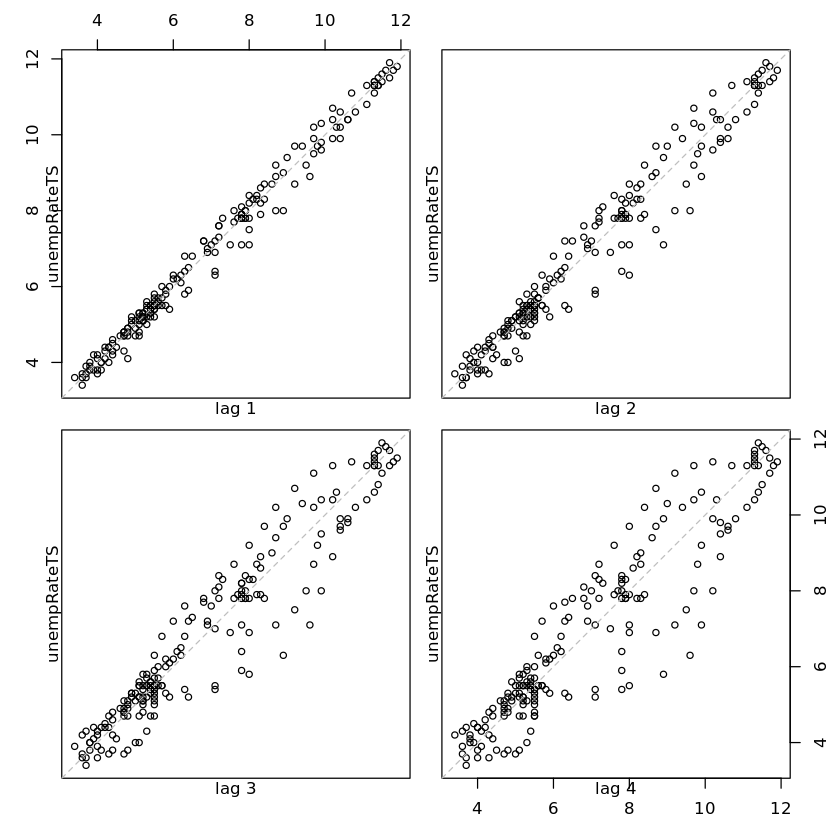

In [3]:
lag.plot(unempRateTS, lags = 4, do.lines = FALSE)

## (d) Regressing the unemployment rate on its lags

Recall, from Activity 4 (Subsection 2.3, Unit A2), that where a time series exhibits strong persistence, it is possible to predict future values of the variable by estimating the coefficient of the autoregressive term when we regress the time series on its own lags, i.e.

\begin{equation*}Y_t \sim Y_{t - 1}.\end{equation*}
    
The lag operator $\text{L}$, also called the backshift operator, can be used to create a lagged variable, i.e.
\begin{equation*}\text{L} Y_t = Y_{t - 1}.\end{equation*}

In R, you can use the following command to create a lagged variable of `Y`.
```
lagY <- c(NA, Y[-length(Y)])
```

### (i)

Create a variable called `lagUnempRate` that is lag 1 of `unempRateTS` before creating the time series object `lagUnempRate` from `lagUnempRate`. Display the first few lines of `lagUnempRateTS` using the `window()` command.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [4]:
lagUnempRate <- c(NA, unempRateTS[-length(unempRateTS)])
lagUnempRateTS <- ts(lagUnempRate, start = c(1971, 1), frequency = 4)
window(lagUnempRateTS, end = c(1975, 4))

Qtr1 Qtr2 Qtr3 Qtr4
1971  NA  3.8  4.1  4.2 
1972 4.4  4.5  4.4  4.3 
1973 4.2  3.9  3.7  3.6 
1974 3.4  3.6  3.6  3.7 
1975 3.7  4.0  4.3  4.7

### (ii)

Compare the output you obtained in part (d)(i) with that you obtained in part (c)(i). Why does this suggest that the lagging has been done correctly?

#### Solution <a class="tocSkip">

Each value in the table for `lagUnempRateTS` corresponds to value one position before in the table for  `unempRateTS`. Also we don't have a value for the unemployment rate in Q4 of 1970, the value for `lagUnempRateTS` in Q1 1971 is given as `NA`.

---

###  <a class="tocSkip">

You are familiar with the R command `lm()`, that is used to estimate linear regression models. So, you can simply regress the  time series `Y` variable on its lagged variable `lagY` in R using the following command.

`modelFit  <- lm(Y ~ lagY)`

### (iii)

Use the empty code cell below to fit a regression model for the `unempRateTS` time series variable, using its lagged values as an explanatory variable. Obtain a summary of the results and compare it to the results in Table 2 of Activity 4 (Subsection 2.3, Unit A2).

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [5]:
# Regressing `unempRateTS` on its lagged values, `LunempRateTS`
reg1 <- lm(unempRateTS ~ lagUnempRateTS)
# Obtaining a summary of the regression results
summary(reg1)


Call:
lm(formula = unempRateTS ~ lagUnempRateTS)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50707 -0.13078 -0.02622  0.12211  0.90387 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.069080   0.057866   1.194    0.234    
lagUnempRateTS 0.990881   0.007975 124.245   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2663 on 197 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9874,	Adjusted R-squared:  0.9873 
F-statistic: 1.544e+04 on 1 and 197 DF,  p-value: < 2.2e-16


### (iv)

Interpret the estimated value of the intercept term of the model estimated in part (iii).

#### Solution <a class="tocSkip">

The intercept term represents the ‘autonomous’ component of unemployment rate – the level of the unemployment rate which does not vary or is influenced by the value of unemployment rate in the previous period. The estimated value of the intercept term is very small (0.069). Moreover, the $p$-value is large (0.234). This means that the estimated value of the intercept term is not statistically different from zero.

### (v)

Interpret the estimated coefficient of the lagged variable `lagUnempRateTS` of the model estimated in part (iii).

#### Solution <a class="tocSkip">

The coefficient for the lagged variable gives the first order autocorrelation for the rate of unemployment. This gives the variation of the unemployment rate that can be explained by the unemployment rate in the previous period. The estimated coefficient (0.991) is very close to 1. The $p$-value is very small and close to zero. This means that the estimated coefficient for the lagged variable is statistically significant.

## (e) Creating a correlogram for the unemployment rate

Recall, from Box 8 (Subsection 2.3, Unit A2), that plotting the correlation coefficient of the variable against its sequentially increasing lags is an elegant way to look at the pattern of correlation coefficients as the lag increases. This plot is known as the correlogram.

In R, a correlogram of a time series `Y` can be plotted using the autocorrelation function `acf` as `acf(Y)`.

### (i)

Use the code cell below to produce a correlogram for `unempRateTS`. 

#### Solution <a class="tocSkip">

The required code and resulting plot are given below.

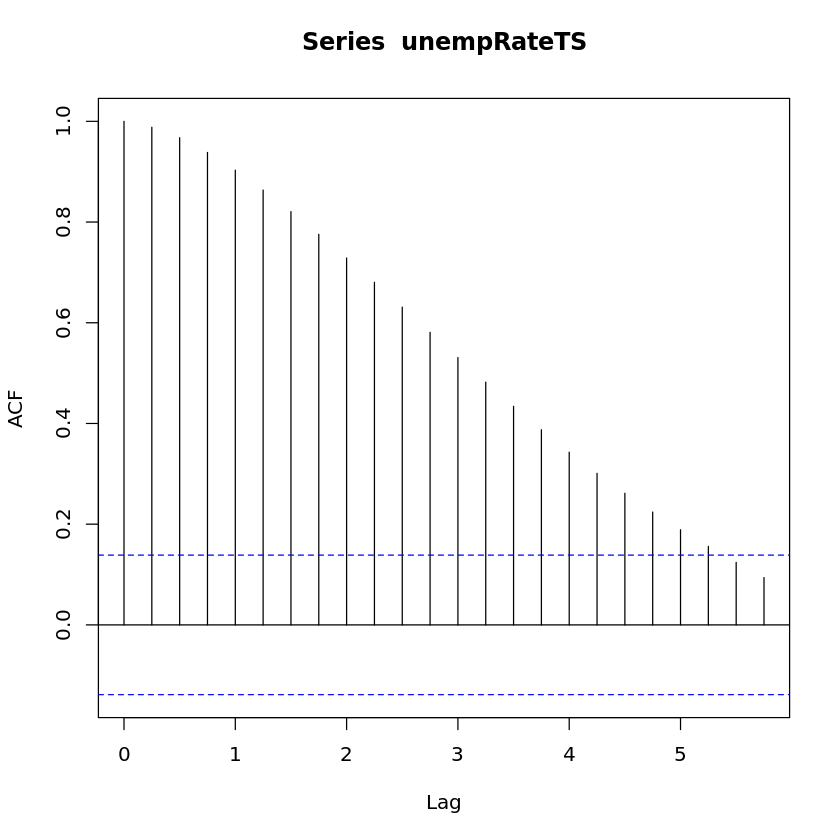

In [6]:
acf(unempRateTS)

### (ii)

What does the correlogram you obtained in part (i) suggest about how far back unemployment and its lags are correlated?

#### Solution <a class="tocSkip">

From the correlogram, we can see that the level of autocorrelation is high for low lag values. 

At lag 0, the autocorrelation is 1. This is expected as time series are perfectly correlated with themselves. 

As the number of lags increases, the autocorrelation declines, but very slowly. This is the pattern we expect for a persistent time series. Note the numbers in the horizontal axis are misleading as they do not represent quarters, but years. So the correlation between unemployment and its lag only becomes statistically negligible after year 5, around lag 21.